##### import numpy as np
np.set_printoptions(precision=3)
np.random.seed(20221110)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.stats as stats

from IPython.display import display, Markdown

## Estimating the population mean, when all we have is a sample

Example:

A paleonotologist would found seven fossil horse skeletons. 
The heights of the skeletons in $cm$ are:

|skeleton|1|2|3|4|5|6|7|
|-|-|-|-|-|-|-|-|
|height [cm]|45.3|47.1|44.2|46.8|46.5|45.5|47.6|

Note that the unit is in square brackets (typically, sometimes in (cm)).
Note that the precision of the measurement of the hight is at one decimal place. The ruler has no finer scale.

Can we estimate the height of the ancient horse population with $C=99\%$ confidence?

Note that we do not know $\sigma$ of the population in this case. We can only calculate the sample standard deviation $s$.

Recall:

$s^2=\frac{\sum_i(x_i-\bar{x})^2}{n-1}$

Note that we have only $\bar{x}$ here. No $\mu$ to be found here.

In [15]:
#So in this case, let's first calculate "by hand"
x_values=np.array([45.3,47.1,44.2,46.8,46.5,45.5,47.6])
n=7

x_mean=0
for i in range(7):
    x_mean+=x_values[i]
x_mean/=n

display(Markdown(rf"""$\bar x$ calculated by hand is {x_mean}"""))
display(Markdown(rf"""$\bar x$ calculated by NumPy is {x_values.mean()}"""))

#Now let's do the sample standard deviation

s_x_bar_sq=0
ddof=1

#First calculate the variance
for i in range(7):
    s_x_bar_sq+=(x_values[i]-x_mean)**2
s_x_bar_sq/=n-ddof 

#Then the sample standard deviation
s_x_bar=np.sqrt(s_x_bar_sq)

display(Markdown(rf"""$s_\bar x$ calculated by hand is {s_x_bar}"""))
display(Markdown(rf"""$s_\bar x$ calculated by NumPy is {x_values.std(ddof=1)}"""))
#Note the ddof in x_values.std!

$\bar x$ calculated by hand is 46.14285714285715

$\bar x$ calculated by NumPy is 46.14285714285715

$s_\bar x$ calculated by hand is 1.1900380145988931

$s_\bar x$ calculated by NumPy is 1.1900380145988931

## Students t-distribution

Recall:

$s=\sqrt{\frac{\sum_i(x_i-\bar{x})^2}{n-1}}$

Let's form the t-scores (t-values, t-transform):

$t=\frac{\bar{x}-\mu}{\frac{s}{\sqrt{n}}}$

The values of the random variable $t$ are distributed by the t-distribuiton with a degree of freedom $d.o.f.=n-1$ (Student's distribution).

Why Student's?

## W.S. Gosset at the Guiness beer corporation

https://en.wikipedia.org/wiki/William_Sealy_Gosset

<img src="William_Sealy_Gosset.jpg" alt="OF" width="400"/>


Text(-0.3, 0.25, 't-dist.')

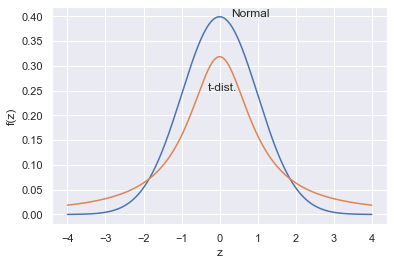

In [28]:
#Let's see the difference bewteen normal and t-distribution

x=np.linspace(-4,4,1000)
std_normal_pdf=stats.norm.pdf(x)

fig=plt.plot(x,std_normal_pdf)
plt.xlabel("z")
plt.ylabel("f(z)")

t_pdf=stats.t.pdf(x,df=1)

fig=plt.plot(x,t_pdf)

plt.text(0.3,0.4,'Normal')
plt.text(-0.3,0.25,'t-dist.')

Text(-0.3, 0.25, 't-dist.')

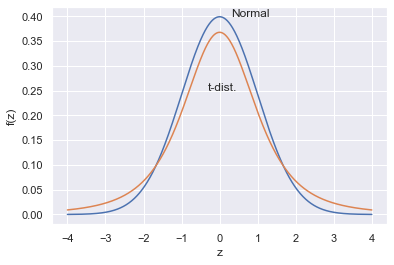

In [33]:
#Let's see the difference bewteen normal and t-distribution
dof=3 #try 5, 10, 100
x=np.linspace(-4,4,1000)
std_normal_pdf=stats.norm.pdf(x)

fig=plt.plot(x,std_normal_pdf)
plt.xlabel("z")
plt.ylabel("f(z)")

t_pdf=stats.t.pdf(x,df=dof)

fig=plt.plot(x,t_pdf)

plt.text(0.3,0.4,'Normal')
plt.text(-0.3,0.25,'t-dist.')

## t-distribution in SciPy

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html


## Finding the interval given a confidence level

For a confidence level $C$ we have:

$P(-t_c<t<t_c)=C$

or 

$P(-t_c\frac{s}{\sqrt{n}}<\bar{x}-\mu<t_c\frac{s}{\sqrt{n}})=C$

or:

$P(\bar{x}-t_c\frac{s}{\sqrt{n}}<\mu<\bar{x}+t_c\frac{s}{\sqrt{n}})=C$


The Marging of error is:

$E=t_c\frac{\sigma}{\sqrt{n}}$

The result of our estimation of $\mu$ by sampling therefore is:

$P(\bar{x}-E<\mu<\bar{x}+E)=C$

or:

$\mu=\bar{x}\pm E$

at confidence level $C$. 

In [57]:
#How to find t_c?
c=0.99
df=10 #do it for 100, 1000, 100000, 1000000
t_c=stats.t.interval(c,df)

print(rf"""The critical interval for confidence 99% for the t-distribution with {df} degrees of freedom is""",t_c)
print("The critical interval for confidence 99% for the normal distribution is",stats.norm.interval(0.99))


The critical interval for confidence 99% for the t-distribution with 10 degrees of freedom is (-3.169272667175838, 3.169272667175838)
The critical interval for confidence 99% for the normal distribution is (-2.5758293035489004, 2.5758293035489004)


## Let's do the horse fossils example again
A paleonotologist would found seven fossil horse skeletons. 
The heights of the skeletons in $cm$ are:

|skeleton|1|2|3|4|5|6|7|
|-|-|-|-|-|-|-|-|
|height [cm]|45.3|47.1|44.2|46.8|46.5|45.5|47.6|

Note that the unit is in square brackets (typically, sometimes in (cm)).
Note that the precision of the measurement of the hight is at one decimal place. The ruler has no finer scale.

Can we estimate the height of the ancient horse population with $C=99\%$ confidence?

Note that we do not know $\sigma$ of the population in this case. We can only calculate the sample standard deviation $s$.

Note that we have only $\bar{x}$ here. No $\mu$ to be found here.


In [69]:
#So in this case, let's first calculate "by hand"
x_values=np.array([45.3,47.1,44.2,46.8,46.5,45.5,47.6])
n=7

x_bar=x_values.mean()

display(Markdown(rf"""$\bar x$ calculated by NumPy is {x_values.mean()}"""))

s_x_bar=x_values.std(ddof=1)

display(Markdown(rf"""$s_\bar x$ calculated by NumPy is {x_values.std(ddof=1)}"""))
#Note the ddof in x_values.std!

c=0.99
df=7-1 #do it for 100, 1000, 100000, 1000000
t_c=stats.t.interval(c,df)

#Standard error for confidance level of 99%

E=t_c[1]*s_x_bar/np.sqrt(n)
display(Markdown(rf"""E for a confidence level of {c} calculated by the formula is {E}"""))

display(Markdown(rf"""The estimated average height of the ancient horses is ${"{:.1f}".format(x_bar)} \pm  {"{:.1f}".format(E)}$ cm."""))
interval=(x_bar-E, x_bar+E)
print("The 99% confidence interval caluclated with the formula is",interval)

$\bar x$ calculated by NumPy is 46.14285714285715

$s_\bar x$ calculated by NumPy is 1.1900380145988931

E for a confidence level of 0.99 calculated by the formula is 1.6675718021247106

The estimated average height of the ancient horses is $46.1 \pm  1.7$ cm.

The 99% confidence interval caluclated with the formula is (44.47528534073244, 47.810428944981865)


In [70]:
#We can calculate directly with the interval method of the t-distribution
interval_scipy=stats.t.interval(c,df,loc=x_bar,scale=s_x_bar/np.sqrt(n))
print("The 99% confidence interval calculated with the t.interval method is",interval_scipy)

The 99% confidence interval calculated with the t.interval method is (44.47528534073244, 47.810428944981865)


## How to round up the numbers in this case?

The round up is dictated by the measuring process. 

The initial measurements were done with a precision of a single decimal place, so we will round up to that. 

Sometimes the round up can be done with a single significant digit of the margin of error.

In this case we could say:

$\mu=46\pm2 cm$

## A problem: we have to assume that the population distribution is normal

If we know that the distribution is not normal, the t-scores are t-distributed only if the sample size $n\geq30$.

So to sum up:


# Estimates!



<pre>
<h3>                 Problem</h3>

<h3>       &darr;                          &darr;</h3>
</pre>

$\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \sigma$ known $\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \sigma$ not known

<pre>
<h3>       &darr;                          &darr;</h3>
</pre>

<pre>
<h3> Use normal dist.           Use t-distribution</h3>
</pre>    

$\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ E=z_c\frac{\sigma}{\sqrt{n}}$  $\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ E=t_c\frac{s}{\sqrt{n}}$ 


<pre>
<h3> &darr;             &darr;             &darr;             &darr;</h3>
</pre> 

<pre>
<h5>Pop. dist.        Pop. dist.      Pop. dist.         Pop. dist. </h5>
</pre>    

<pre>
<h5> normal            unknown          normal             unknown</h5>
</pre>
<pre>
<h5> Any n              n>=30            Any n              n>=30</h5>
</pre>    


In [74]:
#How much would we make an error if we used normal instead of t-distribution
#So in this case, let's first calculate "by hand"
x_values=np.array([45.3,47.1,44.2,46.8,46.5,45.5,47.6])
n=7

x_bar=x_values.mean()

s_x_bar=x_values.std(ddof=1)

c=0.99
df=7-1 #do it for 100, 1000, 100000, 1000000

interval_t=stats.t.interval(c,df,loc=x_bar,scale=s_x_bar/np.sqrt(n))

interval_normal=stats.norm.interval(c,loc=x_bar,scale=s_x_bar/np.sqrt(n))

print("The interval correctly calculated with the t-distribution is", interval_t)
print("The interval incorrectly calculated with the normal distribution is", interval_normal)

The interval correctly calculated with the t-distribution is (44.47528534073244, 47.810428944981865)
The interval incorrectly calculated with the normal distribution is (44.984269494229075, 47.30144479148523)


So the difference is not that great for n=7.

In biology we typically do 3 replicates. 

What is the difference if we have n=3?

In [75]:
x_values=np.array([45.3,47.1,44.2])
n=3

x_bar=x_values.mean()

s_x_bar=x_values.std(ddof=1)

c=0.99
df=n-1 #do it for 100, 1000, 100000, 1000000

interval_t=stats.t.interval(c,df,loc=x_bar,scale=s_x_bar/np.sqrt(n))

interval_normal=stats.norm.interval(c,loc=x_bar,scale=s_x_bar/np.sqrt(n))

print("The interval correctly calculated with the t-distribution is", interval_t)
print("The interval incorrectly calculated with the normal distribution is", interval_normal)

The interval correctly calculated with the t-distribution is (37.144377923729685, 53.92228874293699)
The interval incorrectly calculated with the normal distribution is (43.35611836552172, 47.710548301144954)


t-distribution estimate of the margin of error is important in real-life situations, when the sample size is very small.